       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

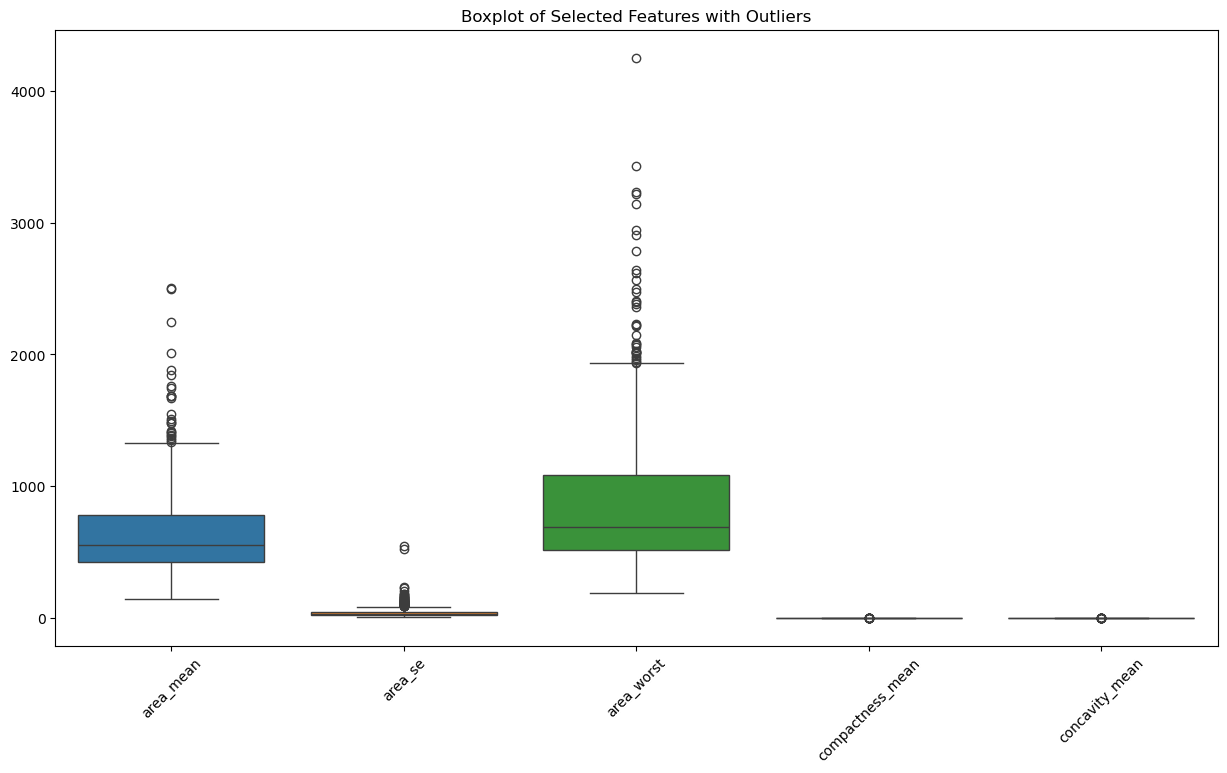

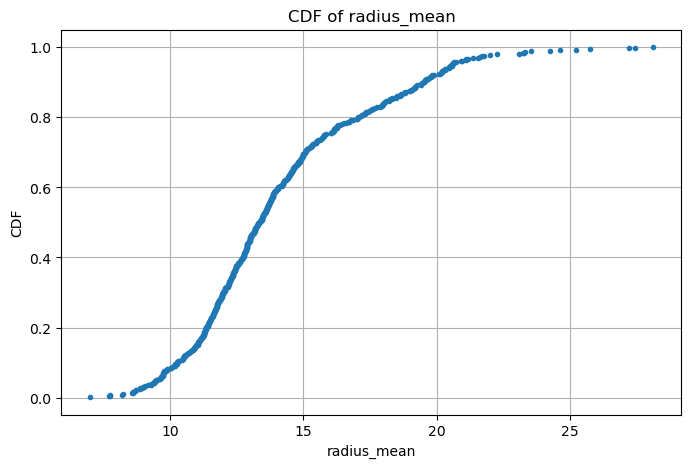

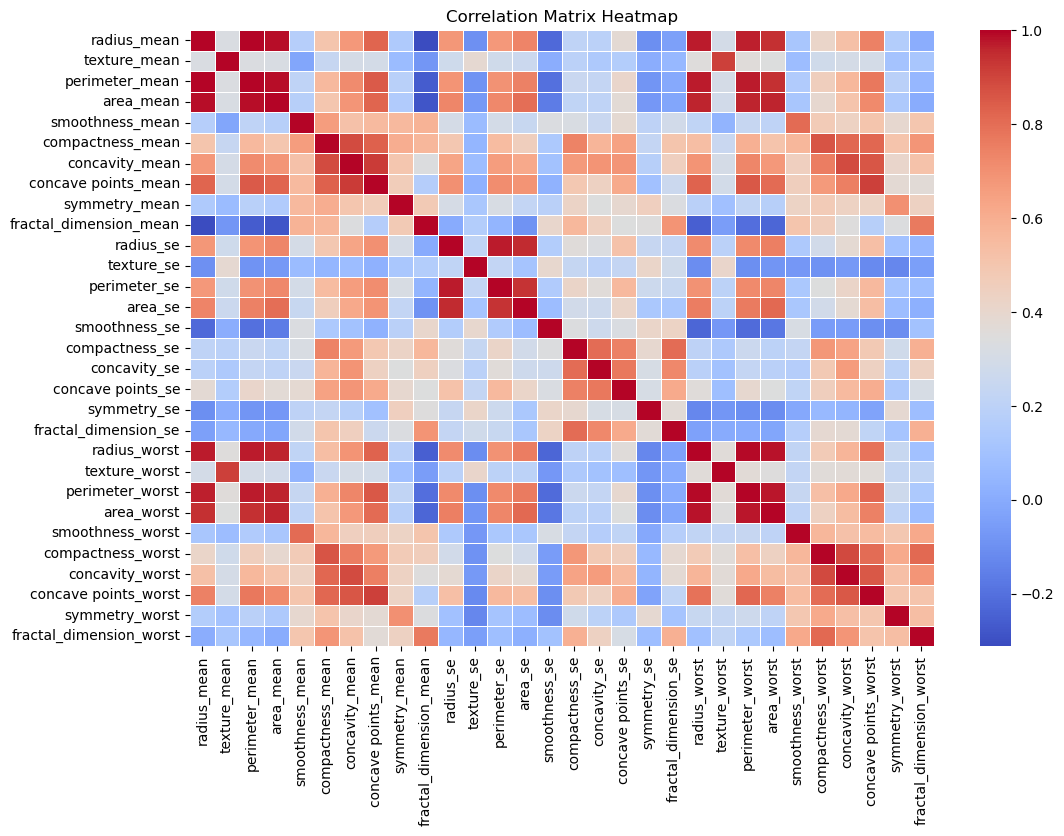

Covariance Matrix:
                   radius_mean  perimeter_mean      area_mean  \
radius_mean         12.418920       85.447142    1224.483409   
perimeter_mean      85.447142      590.440480    8435.772345   
area_mean         1224.483409     8435.772345  123843.554318   
compactness_mean     0.094197        0.714714       9.264931   
concavity_mean       0.190128        1.387234      19.244924   

                  compactness_mean  concavity_mean  
radius_mean               0.094197        0.190128  
perimeter_mean            0.714714        1.387234  
area_mean                 9.264931       19.244924  
compactness_mean          0.002789        0.003718  
concavity_mean            0.003718        0.006355  
Pearson Coefficient: 0.9978552814938108, P-value: 0.0
T-test Statistic: 22.208797758464527, P-value: 1.6844591259582747e-64


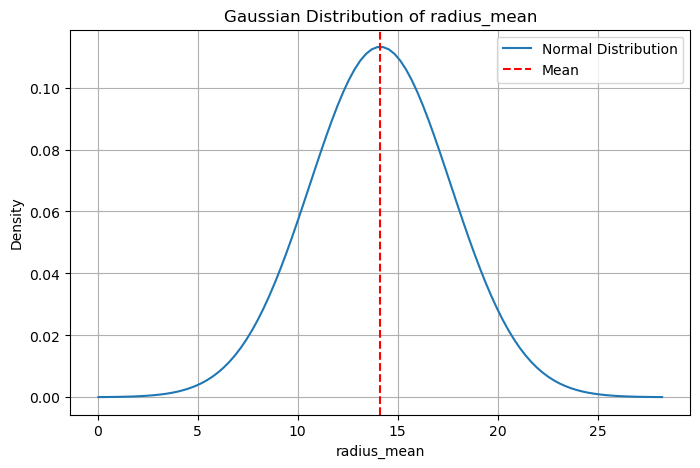

   radius_mean  z_score_radius
0        17.99        1.096100
1        20.57        1.828212
2        19.69        1.578499
3        11.42       -0.768233
4        20.29        1.748758


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, norm
file_path =r"C:\Users\Welcome\OneDrive\Pictures\Desktop\LEVEL 10\Task 3\Task 3 dataset.csv"
df = pd.read_csv(file_path)
df.drop(columns=["id", "Unnamed: 32"], inplace=True, errors="ignore")
print(df.describe())
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
numeric_cols = df.select_dtypes(include=[np.number]) 
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)
plt.figure(figsize=(15, 8))
selected_features = ["area_mean", "area_se", "area_worst", "compactness_mean", "concavity_mean"]
sns.boxplot(data=df[selected_features])
plt.title("Boxplot of Selected Features with Outliers")
plt.xticks(rotation=45)
plt.show()
feature = "radius_mean"
sorted_data = np.sort(df[feature])
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.figure(figsize=(8, 5))
plt.plot(sorted_data, y, marker=".", linestyle="none")
plt.xlabel(feature)
plt.ylabel("CDF")
plt.title(f"CDF of {feature}")
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
selected_features = ["radius_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean"]
covariance_matrix = df[selected_features].cov()
print("Covariance Matrix:\n", covariance_matrix)
pearson_coeff, p_value = pearsonr(df["radius_mean"], df["perimeter_mean"])
print(f"Pearson Coefficient: {pearson_coeff}, P-value: {p_value}")
malignant = df[df["diagnosis"] == "M"]["radius_mean"]
benign = df[df["diagnosis"] == "B"]["radius_mean"]
t_stat, p_val = ttest_ind(malignant, benign, equal_var=False)
print(f"T-test Statistic: {t_stat}, P-value: {p_val}")
mean_val = df["radius_mean"].mean()
std_val = df["radius_mean"].std()
x_vals = np.linspace(mean_val - 4*std_val, mean_val + 4*std_val, 100)
y_vals = norm.pdf(x_vals, mean_val, std_val)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="Normal Distribution")
plt.axvline(mean_val, color="r", linestyle="--", label="Mean")
plt.xlabel("radius_mean")
plt.ylabel("Density")
plt.title("Gaussian Distribution of radius_mean")
plt.legend()
plt.grid(True)
plt.show()
df["z_score_radius"] = (df["radius_mean"] - mean_val) / std_val
print(df[["radius_mean", "z_score_radius"]].head())
